In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/2799434094.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills = plumed.read_as_pandas("data/HILLS")
No handles with labels found to put in legend.


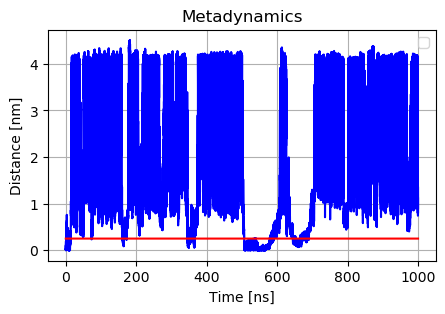

In [2]:
# Import data from the colvar files
data_hills = plumed.read_as_pandas("data/HILLS")
plt.rcParams["figure.figsize"] = (5, 3)

plt.plot(data_hills["time"]*0.001, data_hills["Ox_rho"], 'b')
plt.grid()
threshold = np.empty(len(data_hills["Ox_rho"]))
threshold.fill(0.25)
plt.plot(data_hills["time"]*0.001, threshold, 'r')
plt.title("Metadynamics")
plt.ylabel("Distance [nm]")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

# Reconstruct the free energy profile & reweight with plumed

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/1036373606.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("fes.dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/1036373606.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes_rew = plumed.read_as_pandas("F_REW.dat")


(-0.01, 30)

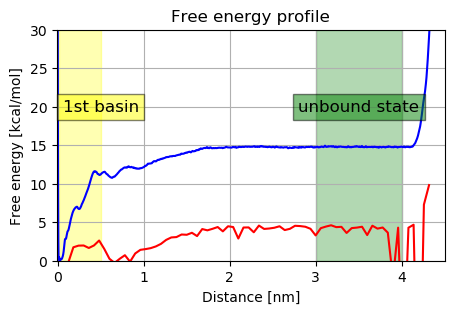

In [19]:
# plumed sum_hills --hills data/HILLS --mintozero
# plumed driver --plumed reweight.dat --noatoms 
# plumed driver --plumed reweight_metadbias.dat --noatoms 
# choose the UPDATE_FROM parameter

fes = plumed.read_as_pandas("fes.dat")
fes_rew = plumed.read_as_pandas("F_REW.dat")
plt.rcParams["figure.figsize"] = (5, 3)

plt.plot(fes["Ox_rho"], fes["file.free"]/4.184, 'b',label="fes from sum_hills")
plt.plot(fes_rew["distance"], fes_rew["f_reweighted"]/4.184, 'r',label="reweighting")
plt.grid()
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kcal/mol]")
plt.axvspan(0.01, 0.5, color='yellow', alpha=0.3)
plt.text(0.5, 20, '1st basin', horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
plt.axvspan(3.0, 4.0, color='green', alpha=0.3)
plt.text(3.5, 20, 'unbound state', horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='green', alpha=0.5))
plt.xlim([-0.01, 4.5])
plt.ylim([-0.01, 30])

# FE as a function of time

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/1371933262.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/1371933262.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/1371933262.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/1371933262.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/1371933262.py:6: UserWarning: cannot load PLUMED instance, conversions will not be avail

(-0.01, 25)

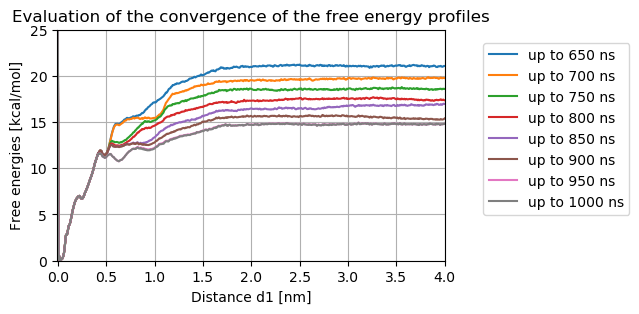

In [18]:
# plumed sum_hills --hills data/HILLS --mintozero --stride 50000


for i in range(13, 21):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
    plt.plot(data["Ox_rho"],data["file.free"]/4.184, label="up to " + str(i*50) + " ns")

plt.grid()
plt.title("Evaluation of the convergence of the free energy profiles")
plt.legend(loc=(1.1, 0.2))
plt.xlabel("Distance d1 [nm]")
plt.ylabel("Free energies [kcal/mol]")
plt.xlim([-0.01, 4])
plt.ylim([-0.01, 25])

## Added bias as a function of time

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/937463288.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  MetaD = plumed.read_as_pandas("data/metad_data.dat")
No handles with labels found to put in legend.


Text(0, 0.5, 'Bias [kcal/mol]')

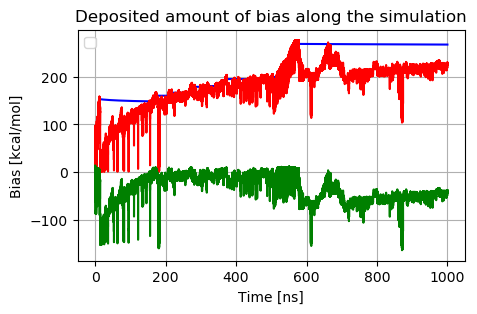

In [4]:
MetaD = plumed.read_as_pandas("data/metad_data.dat")
plt.plot(MetaD["time"]*0.001, MetaD["metad.rct"], 'b')
plt.plot(MetaD["time"]*0.001, MetaD["metad.bias"], 'r')
plt.plot(MetaD["time"]*0.001, MetaD["metad.rbias"], 'g')
plt.title("Deposited amount of bias along the simulation")
plt.grid()
plt.legend(loc="best")
plt.xlabel("Time [ns]")
plt.ylabel("Bias [kcal/mol]")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/2453496.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills = plumed.read_as_pandas("data/HILLS")
No handles with labels found to put in legend.


Text(0, 0.5, 'heights [kcal/mol]')

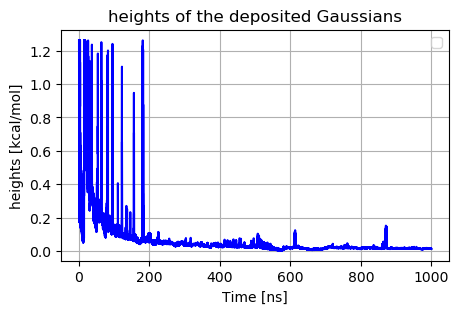

In [3]:
data_hills = plumed.read_as_pandas("data/HILLS")
plt.plot(data_hills["time"]*0.001,data_hills["height"], 'b')
plt.title("heights of the deposited Gaussians")
plt.grid()
plt.legend(loc="best")
plt.xlabel("Time [ns]")
plt.ylabel("heights [kcal/mol]")

# Standard binding free energy as a function of time
$$
\Delta G_b^0=\Delta G_{\text{meta}}-kT\ln(\pi R_{\text{cyl}}^2C_0)
$$

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/3157995970.py:16: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")


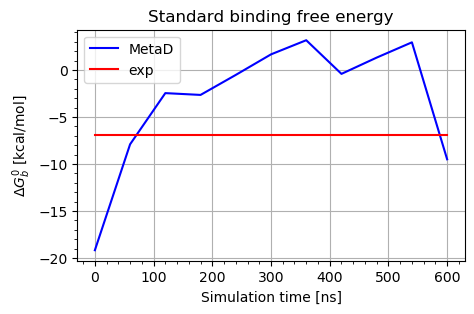

In [20]:
# This is another useful quantity to keep track of.
# We track the free energy difference as a function of time.
# The probability of a CV to stay in a predetermined range is the integral of the probability density
# over that range. The probability density is exp(-beta * F(s)) 

DeltaG=[]
DeltaG_bound=[]
DeltaG_first=[]
DeltaG_second=[]
kT = 1
points = 11
sampling_stride = 60
# cycle on free-energy profiles
for i in range(0, points):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
    # find minimum value of fes
    minf = min(data["file.free"])
    # plot fes
    F0=0.0; F1=0.0; F_unbound=0.0; F2=0.0
    for j in range(0, len(data["Ox_rho"])):
        d = data["Ox_rho"][j]
        # calculate probability
        p = math.exp((-data["file.free"][j]+minf)/kT)
        # integrate in the two basins
        if(0.0<=d<=0.5): F0 += p
        if(0.0<=d<=0.3): F1 += p
        if(0.3<=d<=0.8): F2 += p
        if(3.00<d<=4.00): F_unbound += p
    # calculate free energy difference and add to list. Correction funnel
    R_cyl = 2
    C_0 = 1/1660 
    DeltaG.append(kT*math.log(F_unbound/F0) - 2.58*math.log(math.pi*R_cyl*R_cyl*C_0))
    DeltaG_first.append(kT*math.log(F_unbound/F1) - 2.58*math.log(math.pi*R_cyl*R_cyl*C_0))
    DeltaG_second.append(kT*math.log(F_unbound/F2) - 2.58*math.log(math.pi*R_cyl*R_cyl*C_0))
    DeltaG_bound.append(kT*math.log(F2/F1))   

         
# plot
plt.plot(sampling_stride*np.arange(points), np.array(DeltaG)/4.184, "b", label="MetaD") 
#plt.plot(sampling_stride*np.arange(points), np.array(DeltaG_bound)/4.184, "g", label="Bound states")
#plt.plot(sampling_stride*np.arange(points), np.array(DeltaG_first)/4.184, "c", label="First minimum")
#plt.plot(sampling_stride*np.arange(points), np.array(DeltaG_second)/4.184, "m", label="Second minimum")
# experimental value 
RT = 0.00831*310/4.184
k_d = 12.4*1e-6
experiment = np.empty(len(DeltaG))
experiment.fill(RT*math.log(k_d))
plt.plot(sampling_stride*np.arange(points),experiment, "r", label="exp") 
# labels
plt.xlabel("Simulation time [ns]")
plt.ylabel(r"$\Delta G^0_b$ [kcal/mol]")
plt.title("Standard binding free energy")
plt.legend(loc="best")
plt.grid()
plt.minorticks_on()


$$
\Delta G_b^0=\Delta G_{\text{meta}}-kT\ln(\pi R_{\text{cyl}}^2C_0)=-kT\ln\left(\frac{P_{\text{unbound}}}{P_{\text{bound}}}\right)-kT\ln(\pi R_{\text{cyl}}^2C_0)
$$

# Reweighting on the funnel axis

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2599/1967759502.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  Funnel = plumed.read_as_pandas("data/Ca_EF2_funnel.dat")


Text(0.5, 1.0, 'Unbiased distribution')

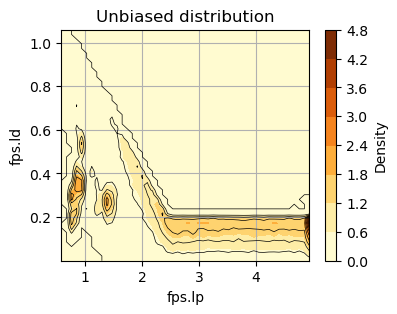

In [9]:
Funnel = plumed.read_as_pandas("data/Ca_EF2_funnel.dat")

bins = 50
start = 150000

# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(Funnel["fps.lp"][start:], Funnel["fps.ld"][start:], bins=bins, density=True)

# Plot filled contour plot
plt.figure(figsize=(4, 3))  # Adjust figure size as needed
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='YlOrBr')
#vmin=-100,vmax=800
plt.colorbar(label='Density')  # Add color bar indicating density
plt.grid()

# Add contour lines
levels = np.linspace(hist.min(), hist.max(), 10)  # Adjust number of contour levels as needed
plt.contour(xedges[:-1], yedges[:-1], hist.T, levels=levels, colors='black', linewidths=0.5)
plt.xlabel(r'fps.lp')
plt.ylabel(r'fps.ld')
plt.title(r'Unbiased distribution')

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1573/4130609458.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  Funnel_fes = plumed.read_as_pandas("F_REW_FUNNEL.dat")


Text(0.5, 0, 'Axial distance fps.lp [nm]')

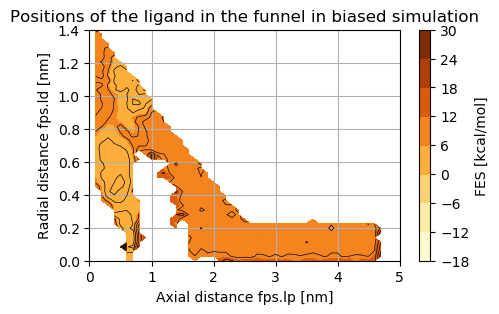

In [50]:
# plumed driver --plumed reweight_funnel.dat --noatoms
Funnel_fes = plumed.read_as_pandas("F_REW_FUNNEL.dat")

# number of bins
grid_min_x = 0.0
grid_max_x = 5.0
grid_min_y = 0.0
grid_max_y = 1.4
nx = 50
ny = 50
x = np.linspace(grid_min_x, grid_max_x, num=nx+1)
y = np.linspace(grid_min_y, grid_max_y, num=ny+1)
f_rew = np.array(Funnel_fes["f_reweighted"]).reshape(nx + 1,ny + 1)

#plt.imshow(T, aspect='auto', origin='lower', extent = (Funnel_fes["z_axis.lp"].min(), Funnel_fes["z_axis.lp"].max(), Funnel_fes["dist.ld"].min(), Funnel_fes["dist.ld"].max()))
# Plot filled contour plot
plt.figure(figsize=(5, 3))  # Adjust figure size as needed
plt.contourf(x, y, f_rew/4.184, cmap='YlOrBr')
plt.colorbar(label='FES [kcal/mol]')  # Add color bar indicating density
plt.grid()
levels = np.linspace(f_rew.min()/4.184, 24, 20)  # Adjust number of contour levels as needed
plt.contour(x, y, f_rew/4.184, levels=levels, colors='black', linewidths=0.5)
plt.title("Positions of the ligand in the funnel in biased simulation")
plt.ylabel("Radial distance fps.ld [nm]")
plt.xlabel("Axial distance fps.lp [nm]")

# Other useful functions

In [9]:
def get_fes(bins, val):
    F = []
    s = []
    mesh = (bins[1] - bins[0])/2
    i = 0
    min = -kT * math.log(val[0])

    while val[i] != 0 and i<len(val)-1:
        F.append(-kT * math.log(val[i]))
        s.append(bins[i] + mesh)
        if F[i] < min:
            min = F[i]
        i = i + 1

    # Remove the offset
    F = F - min*np.ones(len(F))
    return F, s

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/3295673712.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  MetaD = plumed.read_as_pandas("data/metad_data.dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/3295673712.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills = plumed.read_as_pandas("data/HILLS")


Text(0, 0.5, 'Probability density')

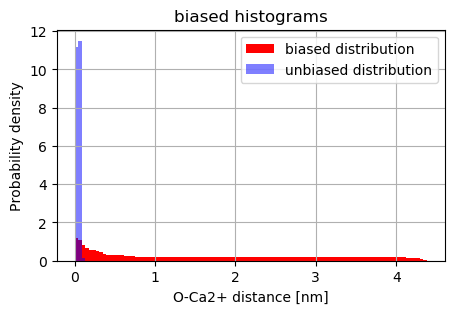

In [12]:
MetaD = plumed.read_as_pandas("data/metad_data.dat")
data_hills = plumed.read_as_pandas("data/HILLS")

val_bias, bins_bias, patches_bias = plt.hist(data_hills["Ox_rho"][500000:], bins=100, density=True, color='r', label="biased distribution")
kT = 1
w = [math.exp(MetaD["metad.bias"][i])/kT for i in range(500000, len(data_hills["Ox_rho"]))]
val_unbias, bins_unbias, patches_unbias = plt.hist(data_hills["Ox_rho"][500000:], bins=100, weights=w, density=True, alpha = 0.5, color= 'b', label="unbiased distribution")
plt.grid()
plt.legend(loc="best")
plt.title("biased histograms")
plt.xlabel("O-Ca2+ distance [nm]")
plt.ylabel("Probability density")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2592/3282617649.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_fes = plumed.read_as_pandas("fes.dat")


(-0.01, 30)

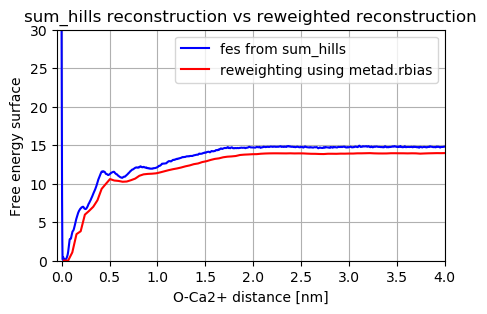

In [16]:
F = []
dist = []
F, dist = get_fes(bins_unbias, val_unbias)

data_fes = plumed.read_as_pandas("fes.dat")
plt.plot(data_fes["Ox_rho"], data_fes["file.free"]/4.184, 'b',label="fes from sum_hills")

# From the fes.dat file (elaboration of the HILLS file, via sum_hills)
plt.plot(dist, F/4.184, 'r',label="reweighting using metad.rbias")
plt.grid()
plt.legend(loc="best")
plt.title("sum_hills reconstruction vs reweighted reconstruction")
plt.xlabel("O-Ca2+ distance [nm]")
plt.ylabel("Free energy surface")
plt.xlim([-0.05, 4])
plt.ylim([-0.01, 30])

In [ ]:
MetaD = plumed.read_as_pandas("metad_data.dat")
walls = plumed.read_as_pandas("walls.dat")
Funnel = plumed.read_as_pandas("Ca_EF3_funnel.dat")
# Define number of bins
bins = 50  # Adjust the number of bins based on your preference

start = 0
w_lp = [math.exp(MetaD["metad.rbias"][i] + walls["lwall.bias"][i] + walls["uwall.bias"][i] + walls["uwall_rmsd.bias"][i] + Funnel["funnel.bias"][i])/kT for i in range(start, len(Funnel["funnel.bias"]))]
w_ld = w_lp

# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(Funnel["fps.lp"][start:], Funnel["fps.ld"][start:], bins=bins, weights=w_lp, density=True)

# Plot filled contour plot
plt.figure(figsize=(4, 3))  # Adjust figure size as needed
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='YlOrBr')
#vmin=-100,vmax=800
plt.colorbar(label='Density')  # Add color bar indicating density

# Add contour lines
levels = np.linspace(hist.min(), hist.max(), 10)  # Adjust number of contour levels as needed
plt.contour(xedges[:-1], yedges[:-1], hist.T, levels=levels, colors='black', linewidths=0.5)
plt.xlabel(r'fps.lp')
plt.ylabel(r'fps.ld')
plt.title(r'Unbiased distribution')

In [ ]:
# 2D FREE ENERGY 

kT = 1
def get_2d_fes(bins_x, bins_y, val):
    F = []
    s_x = []
    s_y = []
    mesh_x = (bins_x[1] - bins_x[0]) / 2
    mesh_y = (bins_y[1] - bins_y[0]) / 2
    
    min_val = np.min(val[np.nonzero(val)])  # Find the minimum non-zero probability value
    min_F = -kT * np.log(min_val)

    for i in range(len(bins_x) - 1):
        F_row = []
        s_x_row = []
        s_y_row = []
        for j in range(len(bins_y) - 1):
            if val[i][j] > 0:
                F_val = -kT * math.log(val[i][j])
            else:
                F_val = -kT * math.log(min_val) # Assign a large value if the probability is zero

            F_row.append(F_val)
            s_x_row.append(bins_x[i] + mesh_x)
            s_y_row.append(bins_y[j] + mesh_y)
        
        F.append(F_row)
        s_x.append(s_x_row)
        s_y.append(s_y_row)

    #F = np.array(F)
    
    # Remove the offset by subtracting the minimum free energy value
    F = F - min_F

    return F, np.array(s_x), np.array(s_y)

In [ ]:
F_zd, z, dist = get_2d_fes(xedges, yedges, hist)
fig, ax = plt.subplots()

#F_min, F_max = -np.abs(F_zd).max(), np.abs(F_zd).max()

c = ax.pcolormesh(z, dist, F_zd, cmap='RdYlGn', vmax=15)
levels = np.linspace(F_zd.min(), F_zd.max(), 10)  # Adjust number of contour levels as needed
ax.contour(xedges[:-1], yedges[:-1], F_zd.T, levels=levels, colors='black', linewidths=0.5)
ax.set_title(r'Free energy surface')
ax.set_xlabel(r'$Z$ axis [nm]')
ax.set_ylabel(r'Radial distance [nm]')
# set the limits of the plot to the limits of the data
fig.colorbar(c, ax=ax)